In [11]:
import sys
import os
import numpy as np
import pandas as pd

In [12]:
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from functions_nfl.import_nfl_readby_parquet import NFLDataLoader

In [13]:
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

from function_library.py_data_visualizations.eda_plots import visualize_correlation_heatmap

In [14]:
nfl_data_loader = NFLDataLoader()

In [15]:
seasons = [2023, 2024, 2025]
pbp_import_df = nfl_data_loader.pbp(seasons)
schedule_import_df = nfl_data_loader.schedule(seasons)
player_weekly_import_df = nfl_data_loader.player_weekly(seasons)
team_weekly_import_df = nfl_data_loader.team_weekly(seasons)

In [16]:
player_weekly_import_df['sack_yards_lost'] = player_weekly_import_df['sack_yards_lost'] * -1

In [17]:
player_stat_df_away = player_weekly_import_df.merge(schedule_import_df, how='left', left_on=['season', 'week', 'team'], right_on=['season', 'week', 'away_team'])
player_stat_df_away.dropna(subset=['game_id'], inplace=True)
player_stat_df_home = player_weekly_import_df.merge(schedule_import_df, how='left', left_on=['season', 'week', 'team'], right_on=['season', 'week', 'home_team'])
player_stat_df_home.dropna(subset=['game_id'], inplace=True)
player_stat_df = pd.concat([player_stat_df_away, player_stat_df_home], axis=0, ignore_index=True)

In [18]:
conditions = [(player_stat_df['team']==player_stat_df['away_team']), (player_stat_df['team']==player_stat_df['home_team'])]
choices = [player_stat_df['away_score'], player_stat_df['home_score']]
player_stat_df['team_pts'] = np.select(conditions, choices, np.nan)
choices = [player_stat_df['home_score'], player_stat_df['away_score']]
player_stat_df['opp_pts'] = np.select(conditions, choices, np.nan)
player_stat_df['team_margin'] = player_stat_df['team_pts'] - player_stat_df['opp_pts']

In [19]:
schedule_import_df.to_csv("csv_output/schedule.csv")
player_weekly_import_df.to_csv("csv_output/weekly_player_df.csv")
player_stat_df.to_csv("csv_output/player_stat_df.csv")

In [20]:
qb_df = player_stat_df[(player_stat_df['position']=='QB') & (player_stat_df['attempts']>5)]

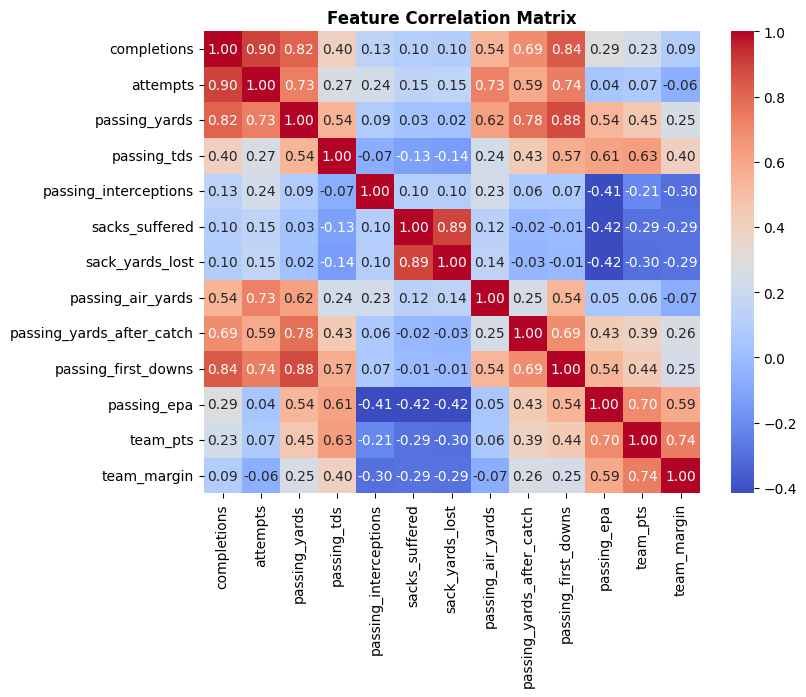

In [21]:
visualize_correlation_heatmap(qb_df, ['completions', 'attempts', 'passing_yards', 'passing_tds', 'passing_interceptions', 'sacks_suffered', 'sack_yards_lost', 
                                      'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'team_pts', 'team_margin'])